In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=1000, n_features=2, n_classes=2 ,n_clusters_per_class=2, n_redundant=0)

In [15]:
X

array([[ 0.64935012,  0.33374056],
       [-1.46179793,  1.00933994],
       [ 0.91058998,  0.84129069],
       ...,
       [ 2.06685707, -1.40357798],
       [ 2.27910383, -1.79853952],
       [ 0.56060854,  2.6891067 ]])

In [16]:
y

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,

In [17]:
pd.DataFrame(X)[0]

0      0.649350
1     -1.461798
2      0.910590
3      0.168374
4      0.479609
         ...   
995   -0.447087
996    0.221246
997    2.066857
998    2.279104
999    0.560609
Name: 0, Length: 1000, dtype: float64

In [18]:
pd.DataFrame(X)[1]

0      0.333741
1      1.009340
2      0.841291
3     -0.073084
4     -0.795342
         ...   
995   -0.942237
996    2.729905
997   -1.403578
998   -1.798540
999    2.689107
Name: 1, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

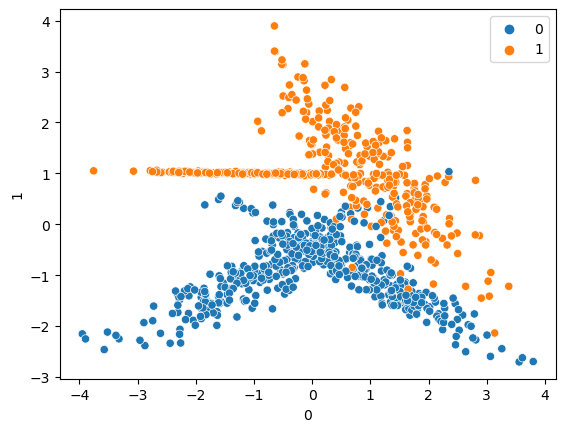

In [19]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=2)

In [23]:
from sklearn.svm import SVC

In [25]:
clf=SVC(kernel='linear')
clf

SVC(kernel='linear')

In [26]:
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [27]:
clf.coef_

array([[0.66634336, 2.67298043]])

In [28]:
y_pred=clf.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [30]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       153
           1       0.97      0.97      0.97       147

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [31]:
confusion_matrix(y_pred, y_test)

array([[149,   4],
       [  4, 143]], dtype=int64)

In [32]:
## hyperparameter tuning

In [61]:
params={'C':[0.1,2,5,10],
       'kernel': ['linear'],
        'gamma':[1,0.1,0.5]
       }

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
grid= GridSearchCV(SVC(),param_grid=params, cv=5, verbose=3 )

In [64]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.914 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.943 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.950 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.907 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.957 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.914 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.943 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.950 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.907 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.957 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.5, kernel=linear;, score=0.914 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.5, kernel=linear;

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 2, 5, 10], 'gamma': [1, 0.1, 0.5],
                         'kernel': ['linear']},
             verbose=3)

In [65]:
grid.best_estimator_

SVC(C=2, gamma=1, kernel='linear')

In [66]:
grid.best_score_

0.9399999999999998

In [67]:
grid.best_params_

{'C': 2, 'gamma': 1, 'kernel': 'linear'}

In [68]:
y_predict=grid.best_estimator_.predict(X_test)

In [69]:
accuracy_score(y_test, y_predict)

0.97